Plotting functions for comparing survival and recovery of groups of species within a single model scenario from the Salish Sea Atlantis Model

In [1]:
import os
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups

## Define scenario and control files

In [2]:
# Read in salish sea atlantis output files.
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/TurnPoint_2020_control/outputSalishSea.nc"
scenario1_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/TurnPoint_2020/outputSalishSea.nc"
# scenario2_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_2019-2023_02/outputSalishSea.nc"
# scenario3_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_2019-2029_02/outputSalishSea.nc"

control = xr.open_dataset(str(control_file), decode_cf=True)
scenario1 = xr.open_dataset(str(scenario1_file), decode_cf=True)
# scenario2 = xr.open_dataset(str(scenario2_file), decode_cf=True)
# scenario3 = xr.open_dataset(str(scenario3_file), decode_cf=True)

t = np.ma.filled(scenario1.variables['t'], np.nan)


In [3]:
# start and end time of data display, after burn-in
start = 101
end = t.size-1

time = t[start:end]

spill_start = np.datetime64('2020-10-19')
# spill_end = np.datetime64('2019-12-31')

In [4]:
# Plot variables
label_size = 11
font_size = 12
line_width = 2
# y_min = 0.8
# y_max = 1.2

## Group plotting functions

- plot_benthos(group)
- plot_pelagic(group)
- plot_cohorts(group)

In [5]:
def plot_benthic(group, scenario): # benthos, shellfish

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of benthic groups across all boxes in Salish Sea Atlantis', fontsize = font_size)
    #ax.set_ylim(y_min,  y_max)

    for species in group:
        benthic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,:], np.nan) # tonnes
        benthic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,:], np.nan)
        ratio = benthic_oiled.sum(axis=1) / benthic_control.sum(axis=1) 
        control_ratio = benthic_control.sum(axis=1)  / benthic_control.sum(axis=1) 
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(group) #, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(spill_start, 1, 'ro', alpha=0.5)
    #ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
    return fig, ax

In [6]:
def plot_benthic_box(group, scenario, box_number): # benthos, shellfish

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of benthic groups across all boxes in Salish Sea Atlantis', fontsize = font_size)
    #ax.set_ylim(y_min, y_max)

    for species in group:
        benthic_oiled = scenario.variables[group[species] + '_N'][start:end,box_number] # tonnes
        benthic_control = control.variables[group[species] + '_N'][start:end,box_number]
        ratio = benthic_oiled / benthic_control
        control_ratio = benthic_control / benthic_control
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(group, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(spill_start, 1, 'ro', alpha=0.5)
    #ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
    return fig, ax

In [7]:
def plot_bacteria(scenario):

    bacteria = groups.bacteria

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of groups in sediment in Salish Sea Atlantis', fontsize = font_size)
    # ax.set_ylim([y_min, y_max])

    for species in bacteria:
        if "pelagic" in species:
            bact_oiled = np.ma.filled(scenario.variables[bacteria[species] + '_N'][start:end,:,0:5], np.nan) # tonnes, take only water column layers
            bact_control = np.ma.filled(control.variables[bacteria[species] + '_N'][start:end,:,0:5,], np.nan)
            b_oiled = bact_oiled.sum(axis=2)
            b_control = bact_control.sum(axis=2)
        else:
            b_oiled = np.ma.filled(scenario.variables[bacteria[species] + '_N'][start:end,:,6], np.nan) # tonnes, take only sediment layer
            b_control = np.ma.filled(control.variables[bacteria[species] + '_N'][start:end,:,6], np.nan)
        
        ratio = b_oiled.sum(axis=1) / b_control.sum(axis=1) 
        control_ratio = b_control.sum(axis=1) / b_control.sum(axis=1)
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(bacteria, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(spill_start, 1, 'ro', alpha=0.5)
    #ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
    return fig, ax

In [8]:
def plot_bacteria_box(scenario, box_number): #bacteria, plankton

    bacteria = groups.bacteria

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of groups in sediment in Salish Sea Atlantis', fontsize = font_size)
    # ax.set_ylim([y_min, y_max])

    for species in bacteria:
        if "pelagic" in species:
            bact_oiled = np.ma.filled(scenario.variables[bacteria[species] + '_N'][start:end,box_number,0:5], np.nan) # tonnes, take only water column layers
            bact_control = np.ma.filled(control.variables[bacteria[species] + '_N'][start:end,box_number,0:5,], np.nan)
            b_oiled = bact_oiled.sum(axis=1)
            b_control = bact_control.sum(axis=1)
        else:
            b_oiled = np.ma.filled(scenario.variables[bacteria[species] + '_N'][start:end,box_number,6], np.nan) # tonnes, take only sediment layer
            b_control = np.ma.filled(control.variables[bacteria[species] + '_N'][start:end,box_number,6], np.nan)
        
        ratio = b_oiled / b_control
        control_ratio = b_control / b_control
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(bacteria, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(spill_start, 1, 'ro', alpha=0.5)
    #ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
    return fig, ax

In [9]:
def plot_sediment(group, scenario): #bacteria, plankton

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of groups in sediment in Salish Sea Atlantis', fontsize = font_size)
    #ax.set_ylim([y_min, y_max])

    for species in group:
        sed_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,:,6], np.nan) # tonnes
        sed_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,:,6], np.nan)
        s_oiled = sed_oiled.sum(axis=1)
        s_control = sed_control.sum(axis=1)
        ratio = s_oiled / s_control
        control_ratio = s_control / s_control
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(group, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(spill_start, 1, 'ro', alpha=0.5)
    #ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
    return fig, ax

In [10]:
def plot_sediment_box(group, scenario, box_number): #bacteria, plankton

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of groups in sediment in Salish Sea Atlantis box ' + str(box_number), fontsize = font_size)
    #ax.set_ylim([y_min, y_max])

    for species in group:
        s_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,box_number,6], np.nan) # tonnes
        s_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,box_number,6], np.nan)
        ratio = s_oiled / s_control
        control_ratio = s_control / s_control
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(group, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(spill_start, 1, 'ro', alpha=0.5)
    #ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
    return fig, ax

In [11]:
def plot_pelagic(group, scenario): #bacteria, plankton

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of pelagic groups across all boxes in Salish Sea Atlantis', fontsize = font_size)
    # ax.set_ylim([y_min, y_max])

    for species in group:
        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,:,0:5], np.nan) # tonnes, take only water column layers
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,:,0:5], np.nan)
        p_oiled = pelagic_oiled.sum(axis=1)
        p_control = pelagic_control.sum(axis=1)
        ratio = p_oiled.sum(axis=1) / p_control.sum(axis=1) 
        control_ratio = p_control.sum(axis=1) / p_control.sum(axis=1)
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(group, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(spill_start, 1, 'ro', alpha=0.5)
    #ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
    return fig, ax

In [12]:
def plot_pelagic_box(group, scenario, box_number): #bacteria, plankton

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('scenario:control')
    ax.set_title('Biomass of pelagic groups in Salish Sea Atlantis box ' + str(box_number), fontsize = font_size)
    #ax.set_ylim([y_min, y_max])

    for species in group:
        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,box_number,0:5], np.nan) # tonnes
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,box_number,0:5], np.nan)
        p_oiled = pelagic_oiled.sum(axis=1)
        p_control = pelagic_control.sum(axis=1)
        ratio = p_oiled / p_control
        control_ratio = p_control / p_control
        ax.plot(time, ratio, linewidth = 2)
    
    ax.legend(group, loc='center left')
    ax.plot(time, control_ratio, 'k',linewidth = 2)
    ax.plot(spill_start, 1, 'ro', alpha=0.5)
    #ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
    return fig, ax

In [13]:
def plot_cohorts(group, scenario):

    y_min = 0.9
    y_max = 1.1

    for species in group:
        fig, ax = plt.subplots(3,1, figsize = (14,9), sharex='all')
        ax[0].set_title(species + ' cohort numbers', fontsize = font_size)
        ax[0].set_ylabel('scenario : control')
        ax[0].tick_params(labelsize=label_size)
        ax[0].set_ylim([y_min, y_max])

        ax[1].set_title(species + ' cohort structural nitrogen (bone size)', fontsize = font_size)
        ax[1].set_ylabel('scenario : control')
        ax[1].tick_params(labelsize=label_size)
        ax[1].set_ylim([y_min, y_max])

        ax[2].set_title(species + ' cohort reserve nitrogen (fatty tissue)', fontsize = font_size)
        ax[2].set_ylabel('scenario : control')
        ax[2].tick_params(labelsize=label_size)
        ax[2].set_ylim([y_min, y_max])

        numCohorts = groups.cohorts[group[species]]
        cohort_names = []

        for cohort_num in range (1, numCohorts+1):

            new_species = group[species] + str(cohort_num)
            cohort_names.append(cohort_num)
        
            o1_numbers = np.ma.filled(scenario.variables[new_species + '_Nums'][:,:,:], np.nan)
            o1_structuralN = np.ma.filled(scenario.variables[new_species +'_StructN'][:,:,:], np.nan)
            o1_reservedN = np.ma.filled(scenario.variables[new_species +'_ResN'][:,:,:], np.nan)

            c1_numbers = np.ma.filled(control.variables[new_species + '_Nums'][:,:,:], np.nan)
            c1_structuralN = np.ma.filled(control.variables[new_species +'_StructN'][:,:,:], np.nan)
            c1_reservedN = np.ma.filled(control.variables[new_species +'_ResN'][:,:,:], np.nan)

            o2_numbers = o1_numbers.sum(axis=2)
            o2_structuralN = o1_structuralN.sum(axis=2)
            o2_reservedN = o1_reservedN.sum(axis=2)

            c2_numbers = c1_numbers.sum(axis=2)
            c2_structuralN = c1_structuralN.sum(axis=2)
            c2_reservedN = c1_reservedN.sum(axis=2)

            numbers = o2_numbers.sum(axis=1) / c2_numbers.sum(axis=1)
            structuralN = o2_structuralN.sum(axis=1) / c2_structuralN.sum(axis=1)
            reservedN = o2_reservedN.sum(axis=1) / c2_reservedN.sum(axis=1)
            control_ratio = c2_reservedN.sum(axis=1) / c2_reservedN.sum(axis=1)

            ax[0].plot(time, numbers[start:end], linewidth = line_width)
            ax[1].plot(time, structuralN[start:end],linewidth = line_width)
            ax[2].plot(time, reservedN[start:end],linewidth = line_width)

        ax[0].legend(cohort_names, loc='center left')
        ax[0].plot(time, control_ratio[start:end], 'k',linewidth = 2)
        ax[0].plot(spill_start, 1, 'ro', alpha=0.5)
        #ax[0].plot([spill_start, spill_start], [y_min, y_max], 'r', alpha=0.1)
        #ax[0].plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)

        ax[1].plot(time, control_ratio[start:end], 'k',linewidth = 2)
        ax[1].plot(spill_start, 1, 'ro', alpha=0.5)
        #ax[1].plot([spill_start, spill_start], [y_min, y_max], 'r', alpha=0.1)
        #ax[1].plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)

        ax[2].plot(time, control_ratio[start:end], 'k',linewidth = 2)
        ax[2].plot(spill_start, 1, 'ro', alpha=0.5)
        #ax[2].plot([spill_start, spill_start], [y_min, y_max], 'r', alpha=0.1)
        #ax[2].plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)

    return fig, ax
    

In [14]:
def plot_pelagic_pah(group, pah, scenario):

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('mgPAH')
    ax.set_title(pah + 'in pelagic groups in Salish Sea Atlantis', fontsize = font_size)

    for species in group:
        pelagic_oiled = scenario.variables[group[species] + '_' + pah][start:end,:,:]
        p_oiled = pelagic_oiled.sum(axis=2)
        p_oiled = pelagic_oiled.sum(axis=1)
        ax.plot(time, p_oiled, linewidth = 2)
    
    ax.legend(group)
    return fig, ax

In [15]:
def plot_pelagic_pah_box(group, pah, scenario, box_number):

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('mgPAH')
    ax.set_title(pah + 'in pelagic groups in Salish Sea Atlantis box ' + str(box_number), fontsize = font_size)

    for species in group:
        pelagic_oiled = scenario.variables[group[species] + '_' + pah][start:end,box_number,:]
        p_oiled = pelagic_oiled.sum(axis=1)
        ax.plot(time, p_oiled, linewidth = 2)
    
    ax.legend(group, loc='center left')
    return fig, ax

In [16]:
def plot_pah(pah, scenario):

    fig, ax = plt.subplots(figsize = (14,3))
    ax.tick_params(labelsize=label_size)
    ax.set_ylabel('mgPAH')
    ax.set_title(pah + ' in in Salish Sea Atlantis', fontsize = font_size)

    pelagic_oiled = scenario.variables[pah][start:end,:,:]
    p_oiled = pelagic_oiled.sum(axis=2)
    p_oiled = pelagic_oiled.sum(axis=1)
    ax.plot(time, p_oiled, linewidth = 2)
    ax.plot(spill_start, 0, 'ro', alpha=0.5)
    
    return fig, ax

## Plotting group ratios

### Across whole simulation

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Benzo in in Salish Sea Atlantis'}, ylabel='mgPAH'>)

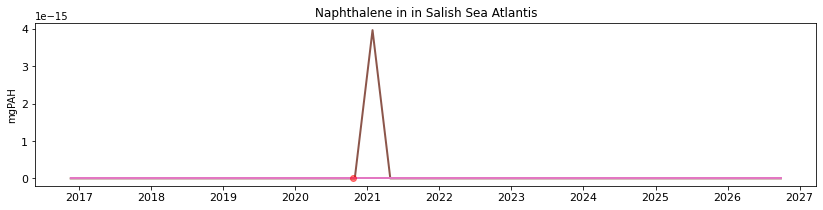

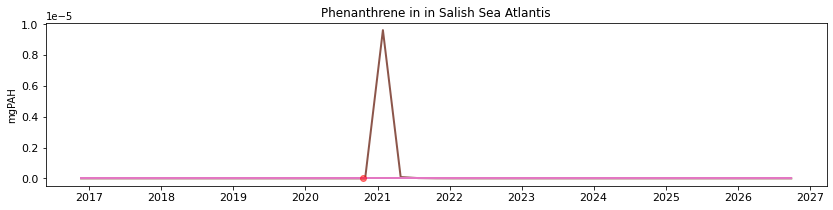

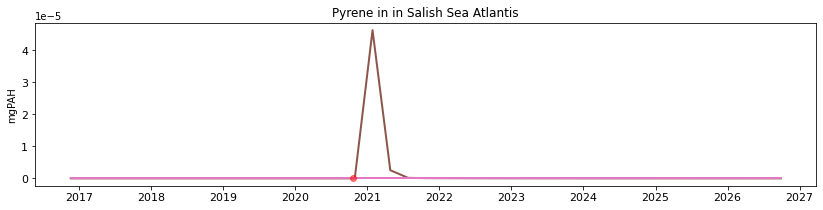

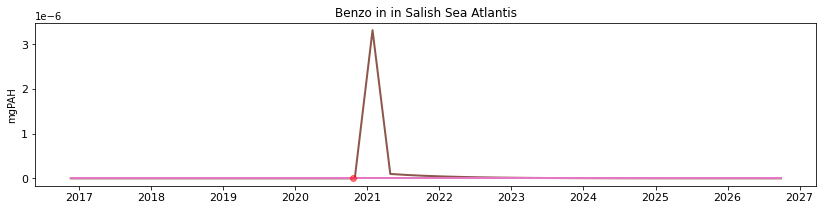

In [17]:
plot_pah('Naphthalene', scenario1)
plot_pah('Phenanthrene', scenario1)
plot_pah('Pyrene', scenario1)
plot_pah('Benzo', scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

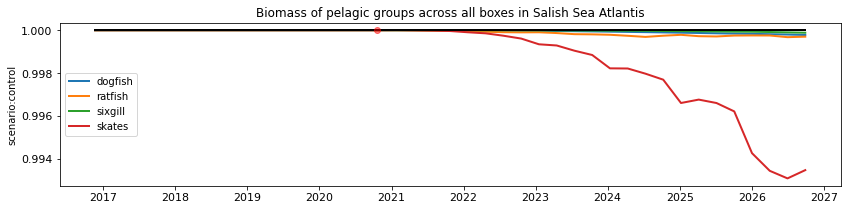

In [18]:
plot_pelagic(groups.sharks, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

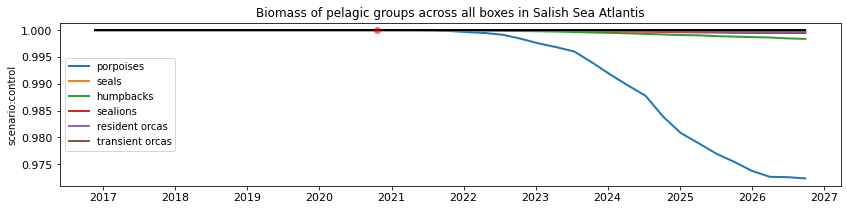

In [29]:
plot_pelagic(groups.mammals, scenario1)

/tmp/ipykernel_1857004/3360614269.py:14: RuntimeWarning: invalid value encountered in true_divide
  ratio = p_oiled.sum(axis=1) / p_control.sum(axis=1)
/tmp/ipykernel_1857004/3360614269.py:15: RuntimeWarning: invalid value encountered in true_divide
  control_ratio = p_control.sum(axis=1) / p_control.sum(axis=1)


(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

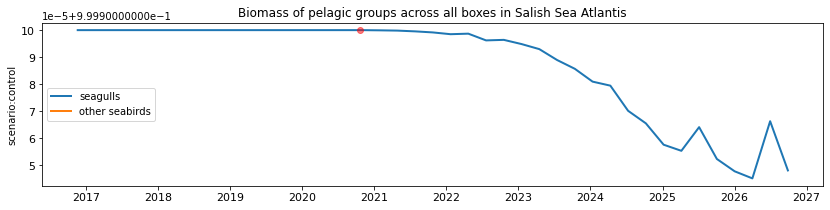

In [30]:
plot_pelagic(groups.birds, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

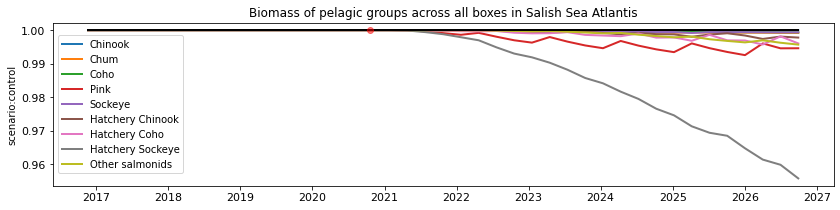

In [31]:
plot_pelagic(groups.salmon, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

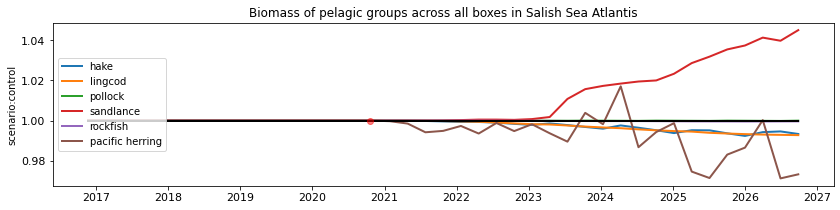

In [32]:
plot_pelagic(groups.named_fish, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

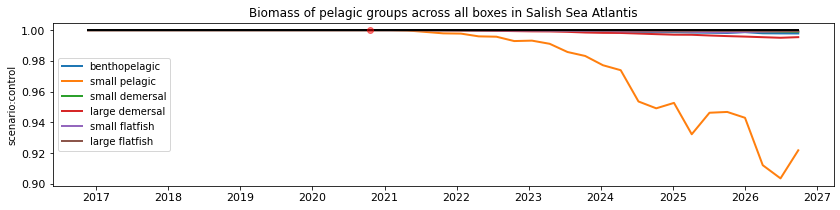

In [33]:
plot_pelagic(groups.other_fish, scenario1)

### Closer to time of the spill

In [19]:
start = 115
end = 120
time = t[start:end]

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

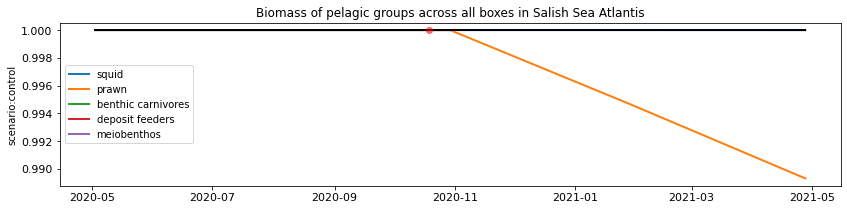

In [21]:
plot_pelagic(groups.pelagic_invertebrates, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

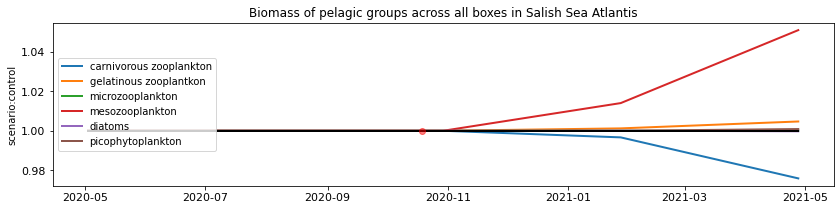

In [20]:

plot_pelagic(groups.plankton, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of groups in sediment in Salish Sea Atlantis'}, ylabel='scenario:control'>)

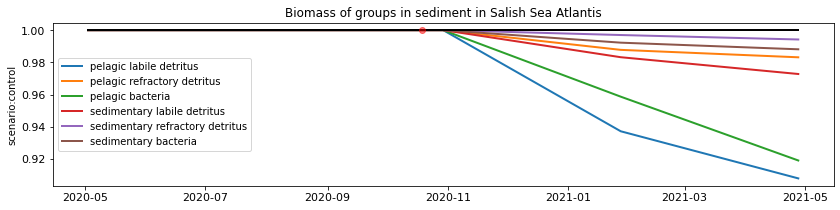

In [41]:
plot_bacteria(scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of groups in sediment in Salish Sea Atlantis'}, ylabel='scenario:control'>)

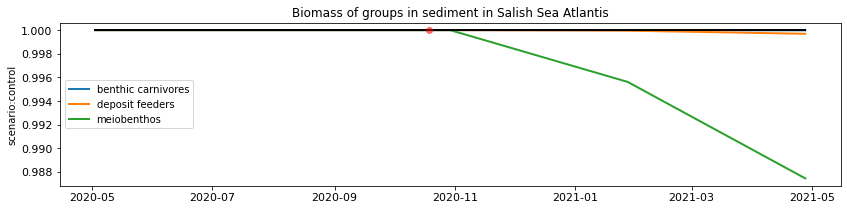

In [46]:
plot_sediment(groups.benthic_feeders, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of benthic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

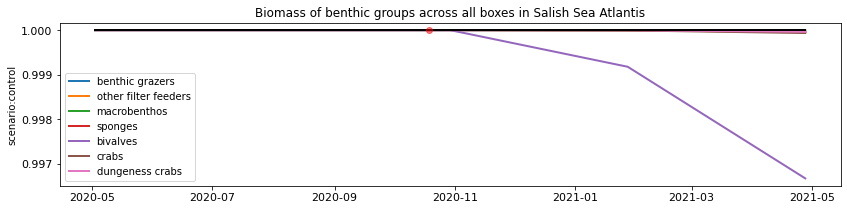

In [48]:
plot_benthic(groups.benthic_invertebrates, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of benthic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

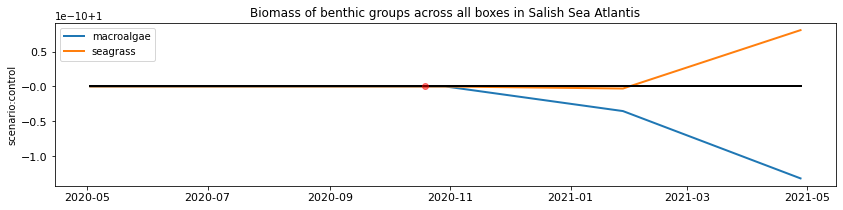

In [50]:
plot_benthic(groups.macroalgae, scenario1)

### Individual boxes

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of benthic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

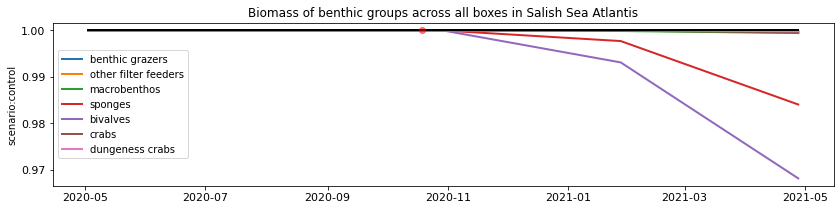

In [53]:
plot_benthic_box(groups.benthic_invertebrates, scenario1, 60)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of benthic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

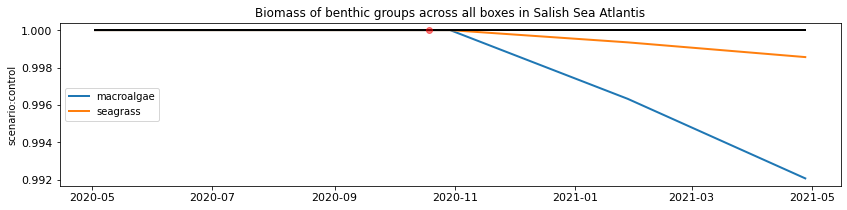

In [55]:
plot_benthic_box(groups.macroalgae, scenario1, 60)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of groups in sediment in Salish Sea Atlantis box 60'}, ylabel='scenario:control'>)

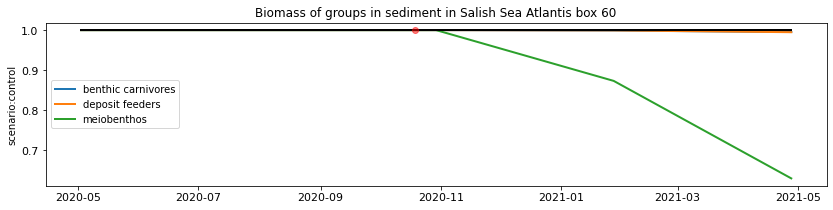

In [56]:
plot_sediment_box(groups.benthic_feeders, scenario1, 60)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of groups in sediment in Salish Sea Atlantis'}, ylabel='scenario:control'>)

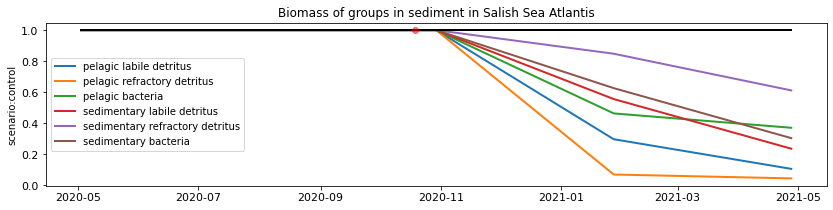

In [59]:
plot_bacteria_box(scenario1, 60)

/tmp/ipykernel_1857004/1910556109.py:14: RuntimeWarning: invalid value encountered in true_divide
  ratio = p_oiled / p_control
/tmp/ipykernel_1857004/1910556109.py:15: RuntimeWarning: invalid value encountered in true_divide
  control_ratio = p_control / p_control


(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups in Salish Sea Atlantis box 60'}, ylabel='scenario:control'>)

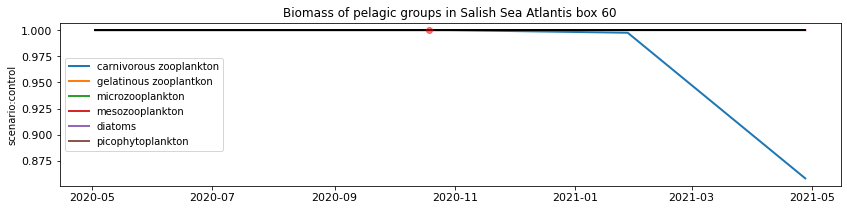

In [60]:
plot_pelagic_box(groups.plankton, scenario1, 60)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of groups in sediment in Salish Sea Atlantis box 60'}, ylabel='scenario:control'>)

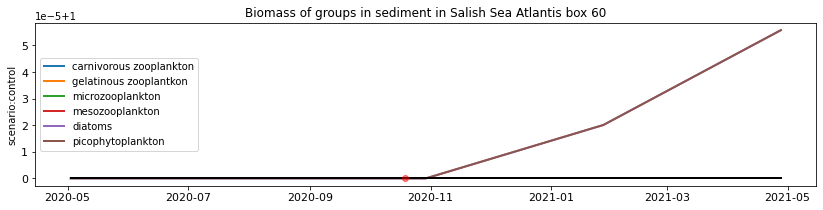

In [61]:
plot_sediment_box(groups.plankton, scenario1, 60)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups in Salish Sea Atlantis box 60'}, ylabel='scenario:control'>)

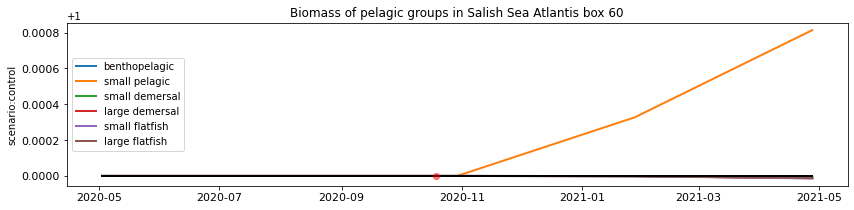

In [62]:
plot_pelagic_box(groups.other_fish, scenario1, 60)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups in Salish Sea Atlantis box 60'}, ylabel='scenario:control'>)

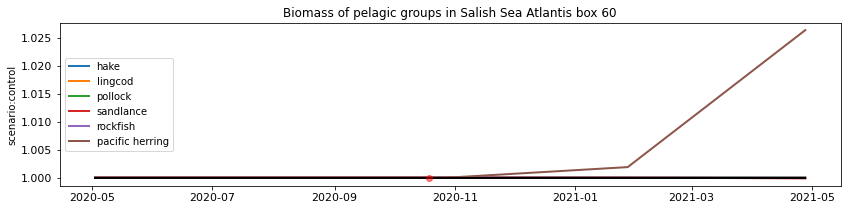

In [63]:
plot_pelagic_box(groups.named_fish, scenario1, 60)

### Pelagic cohorts
Chinook_salmon, Chum_salmon, Coho_salmon, Pink_salmon, Sockeye_salmon, Hatchery_Chinook_salmon, Hatchery_Coho_salmon, Hatchery_Sockeye_salmon, Other_salmonids,
Dogfish, Ratfish, Sixgill, Skates, Harbor_porpoise, Harbor_seals, Humpback_whales, Sealions,
Orcas_resident, Orcas_transient, Benthopelagic, Small_pelagic_fish, Small_Demersal_fish, Large_Demersal_fish,
Small_Flatfish, Large_Flatfish, Hake, Lingcod, Pollock, Sandlance, Rockfish, Pacific_herring,
Seabird_gulls, Seabirds

In [ ]:
start = 115
end = t.size-1

time = t[start:end]

plot_cohorts(groups.salmon, scenario1)

### Other plots

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

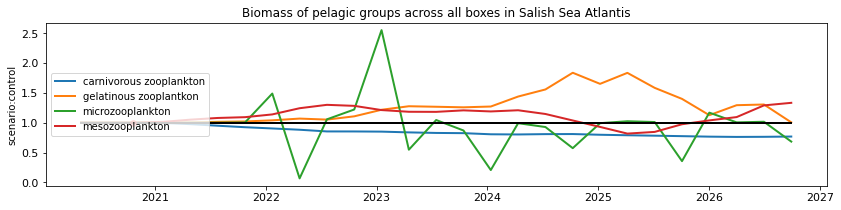

In [68]:
plot_pelagic(groups.zooplankton, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Biomass of pelagic groups across all boxes in Salish Sea Atlantis'}, ylabel='scenario:control'>)

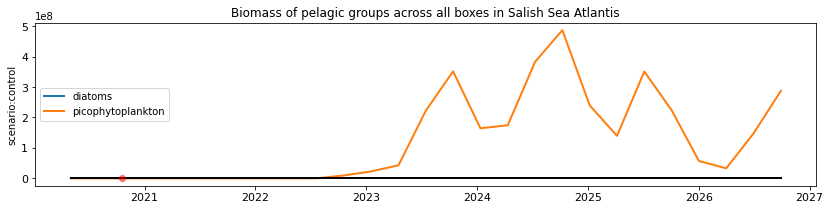

In [69]:
plot_pelagic(groups.phytoplankton, scenario1)

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Naphthalenein pelagic groups in Salish Sea Atlantis box 60'}, ylabel='mgPAH'>)

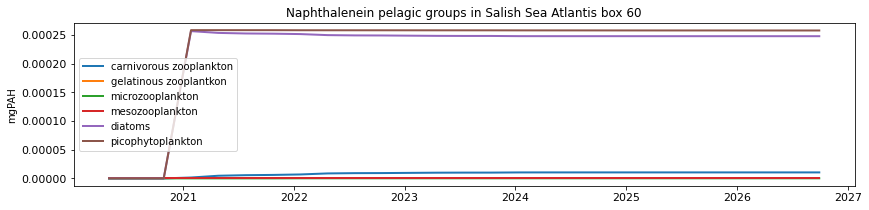

In [71]:
plot_pelagic_pah_box(groups.plankton, 'Naphthalene', scenario1, 60) 

(<Figure size 1008x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Naphthalenein pelagic groups in Salish Sea Atlantis box 60'}, ylabel='mgPAH'>)

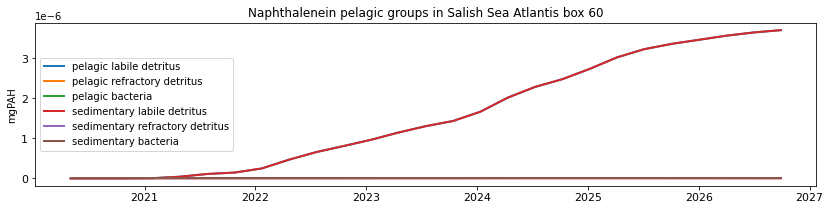

In [72]:
plot_pelagic_pah_box(groups.bacteria, 'Naphthalene', scenario1, 60)